In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import matplotlib.pyplot as plt

from pandas import DataFrame

#  Centroid-Based Clustering

### k-Means

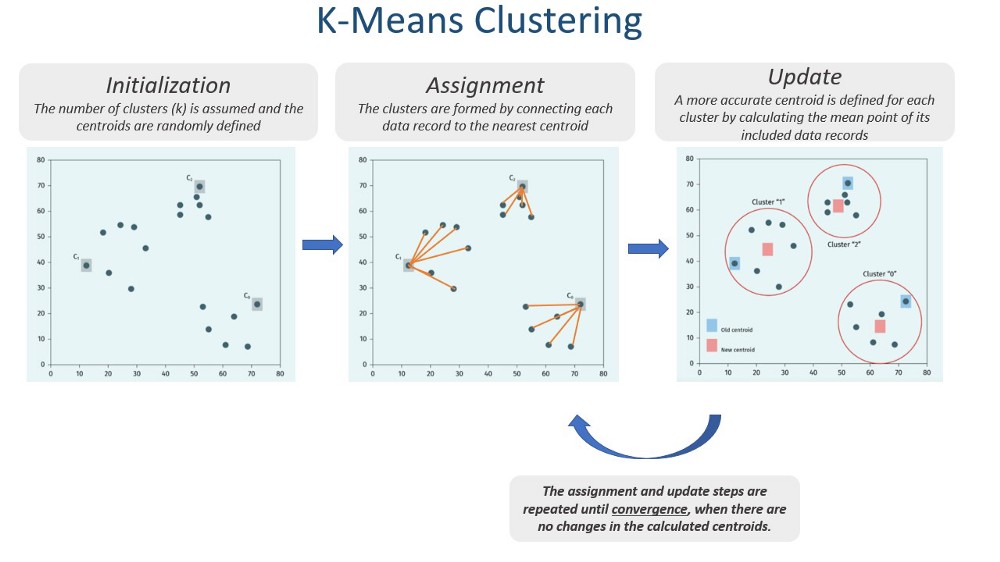

In [ ]:
from sklearn.cluster import KMeans

In [6]:
Data={'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
      'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]}

df = DataFrame(Data,columns=['x','y'])

In [7]:
# Create and fit the KMeans model

kmeans = KMeans(n_clusters=3).fit(df)

In [8]:
# Find the centroids of the clusters

centroids = kmeans.cluster_centers_
centroids

array([[23.42857143, 44.57142857],
       [62.33333333, 15.83333333],
       [50.        , 63.16666667]])

In [9]:
# Get the associated cluster for each data record

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
      dtype=int32)

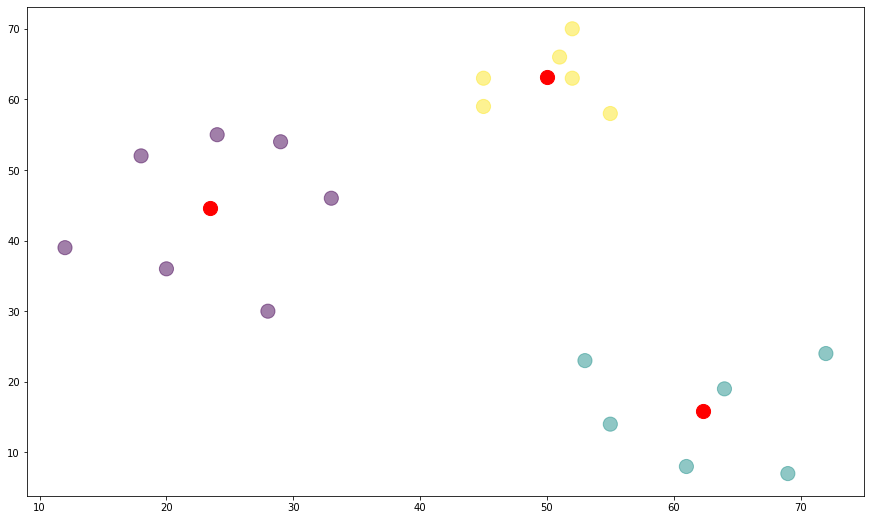

In [16]:
# Display the clusters contents and their centroids

plt.figure(figsize=(15,9))
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=200, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200)

The centroid of each cluster is displayed in red.

In [17]:
# Use the model to predict the cluster(s) of another input(s)

kmeans.predict([[20, 20], [60, 40]])

array([0, 1], dtype=int32)

### The default function of KMeans() in Python is written with its main parameters as follows:

KMeans(n_clusters=8,init=’kmeans++’,n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’)

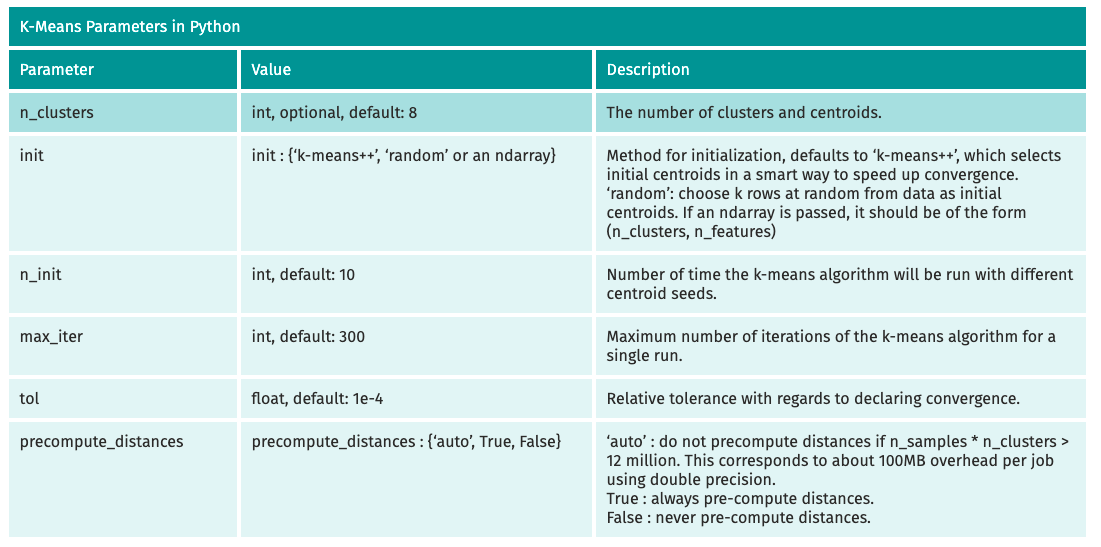

# Gaussian Mixture Models Clustering

### Expectation Maximization Algorithm

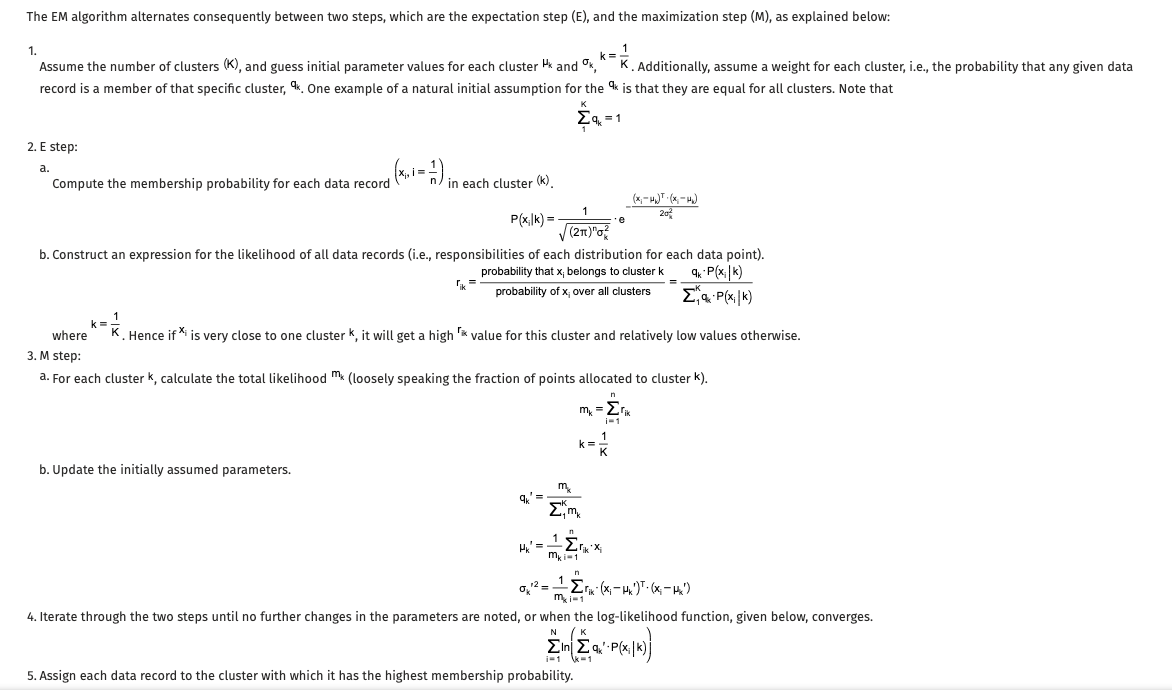

In [20]:
from sklearn.mixture import GaussianMixture
from sklearn import datasets

In [21]:
# load the iris dataset

iris = datasets.load_iris()

In [22]:
# select first two columns

X = iris.data[:, :2]

In [23]:
d = pd.DataFrame(X)

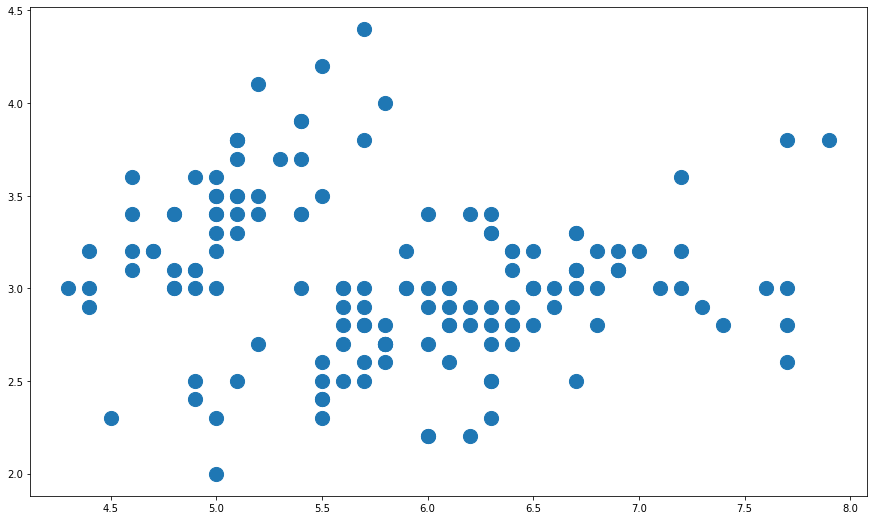

In [27]:
plt.figure(figsize=(15,9))
plt.scatter(d[0], d[1], s=200)

In [28]:
# fit the data as a mixture of 3 Gaussians

gmm = GaussianMixture(n_components = 3)

gmm.fit(d)

GaussianMixture(n_components=3)

In [29]:
# predict the cluster of each data record

labels = gmm.predict(d)

In [30]:
# Check if the model has converged

print('Converged:',gmm.converged_)

Converged: True


In [31]:
# print the number of iterations needed

print(gmm.n_iter_)

8


In [32]:
# get the final “means” for each cluster

means = gmm.means_

means

array([[5.9009976 , 2.74387546],
       [6.68055626, 3.02849627],
       [5.01507898, 3.4514463 ]])

In [33]:
# get the final “standard deviations” (i.e., covariance matrix) for each cluster

covariances = gmm.covariances_

covariances

array([[[0.27671149, 0.08897036],
        [0.08897036, 0.09389206]],

       [[0.36153508, 0.05159664],
        [0.05159664, 0.08927917]],

       [[0.11944714, 0.08835648],
        [0.08835648, 0.11893388]]])

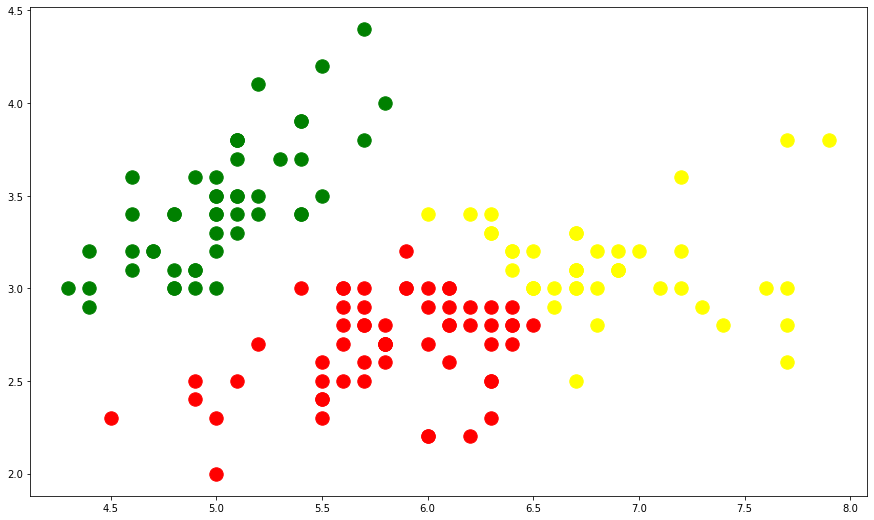

In [34]:
# plot the data records in each clusters in different color

d['labels']= labels

d0 = d[d['labels']== 0]

d1 = d[d['labels']== 1]

d2 = d[d['labels']== 2]

plt.figure(figsize=(15,9))

plt.scatter(d0[0], d0[1], c ='r', s=180)
plt.scatter(d1[0], d1[1], c ='yellow', s=180)
plt.scatter(d2[0], d2[1], c ='g', s=180)

# Hierarchical Clustering

### Agglomerative Clustering Algorithm

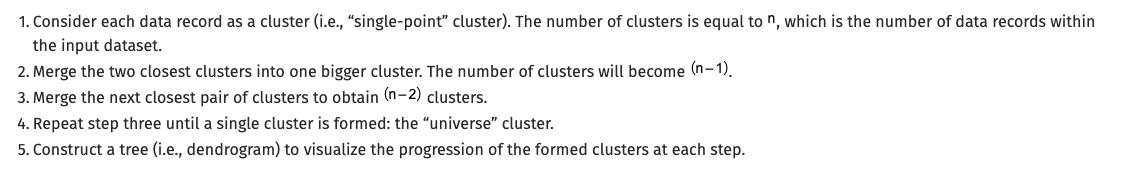

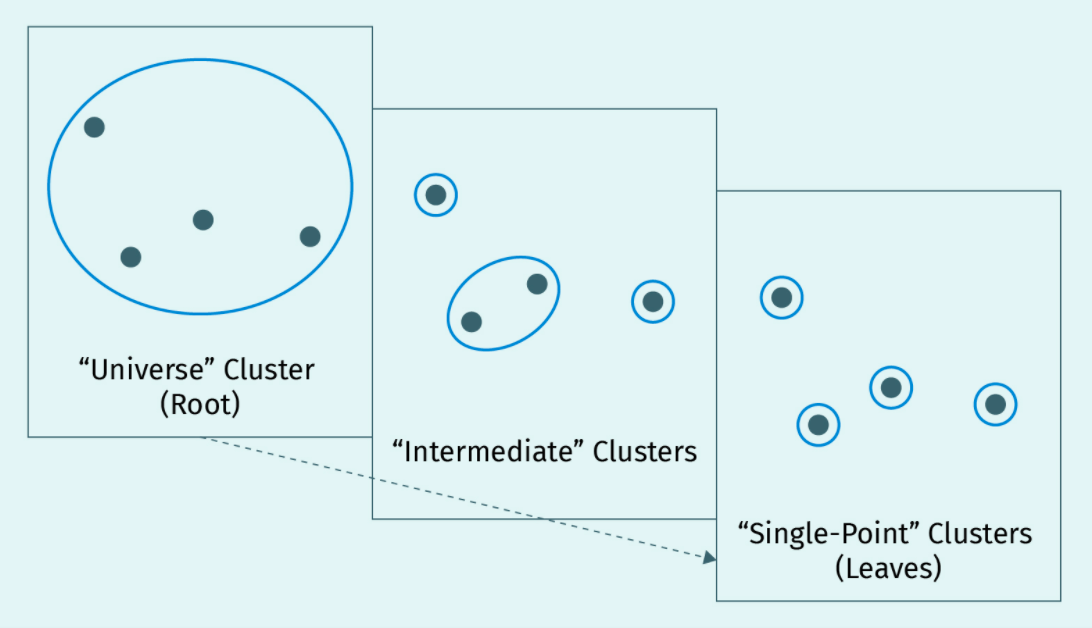

In [40]:
data = pd.read_csv('../input/wholesale-customers-data-set/Wholesale customers data.csv')

In [42]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [43]:
#Normalize the dataset to get all the features at the same scale

from sklearn.preprocessing import normalize

data_scaled = normalize(data)

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


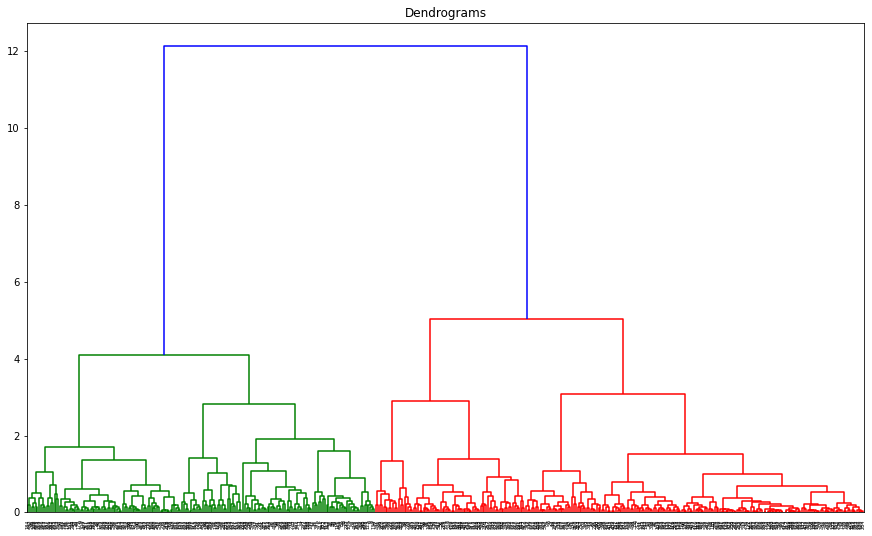

In [45]:
# Draw the dendrogram to find the optimum number of clusters

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 9))

plt.title("Dendrograms")

dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [47]:
# hence we can decide an optimum number of clusters equals 2

# apply hierarchical clustering foe two clusters only

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

where “0” implies a customer in the first cluster, and “1” implies a customer in the second cluster.

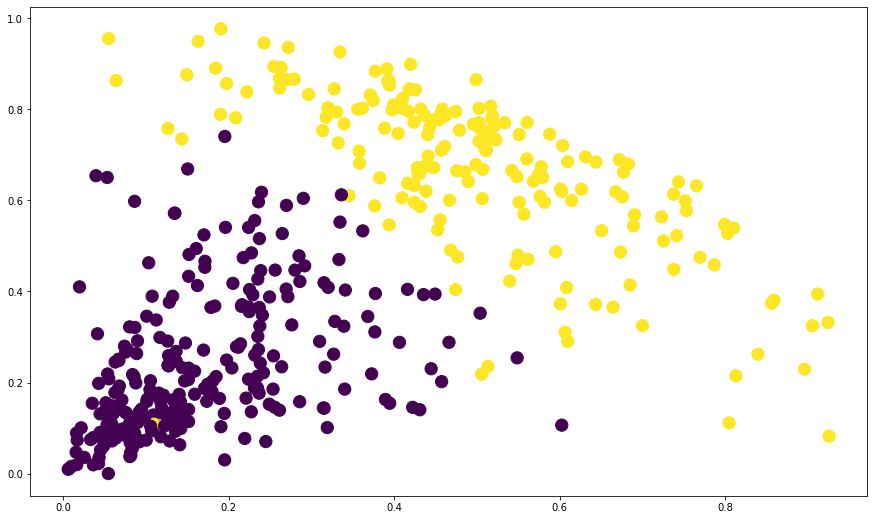

In [49]:
# to visualize the two clusters

plt.figure(figsize=(15, 9))

plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_, s=150)

# Density-Based Clustering

### DBSCAN Algorithm

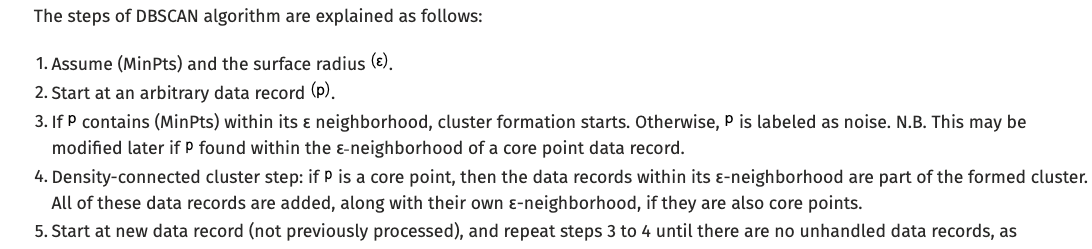

In [50]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


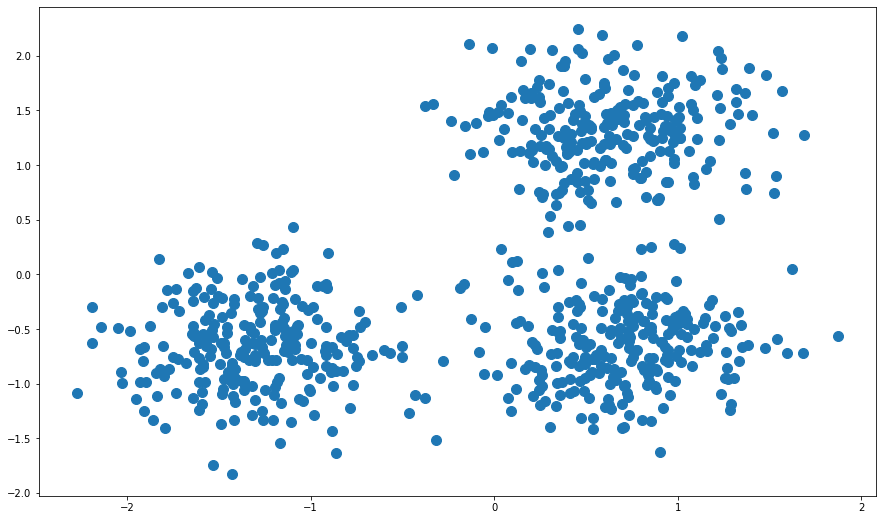

In [52]:
# Generate sample data

centers = [[1, 1], [-1, -1], [1, -1]]

X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

# Scale and standardize the dataset

X = StandardScaler().fit_transform(X)

xx, yy = zip(*X)

plt.figure(figsize=(15,9))
plt.scatter(xx,yy, s=100)

In [55]:
# Set up DBSCAN parameters

db = DBSCAN(eps=0.3, min_samples=10).fit(X)

core_samples = db.core_sample_indices_

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

core_samples_mask[db.core_sample_indices_] = True

In [56]:
# the number of clusters

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

n_clusters_

3

In [57]:
labels = db.labels_

labels

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2,  0,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2

if the label equals “-1”, this means the data record is an outlier.

In [58]:
# find the outliers

outliers = X[labels == -1]

outliers

array([[-1.4302079 , -1.82380068],
       [-0.13447918,  2.11039748],
       [ 1.22425496,  0.50161091],
       [ 1.53624088,  0.89460489],
       [ 1.68745105,  1.27830756],
       [-1.53199232, -1.74146844],
       [-0.42227599, -0.19034456],
       [ 1.52307352,  0.74115752],
       [-0.46307453, -1.26531795],
       [ 1.62198217,  0.05020132],
       [ 1.01170962,  0.24102378],
       [-0.43185167, -1.10093485],
       [-0.3164503 , -1.51218921],
       [-2.19229513, -0.30228576],
       [ 0.9807011 ,  0.27373202],
       [-0.86338803, -1.63431796],
       [ 1.87043803, -0.56476419],
       [-0.37447929, -1.13624183]])

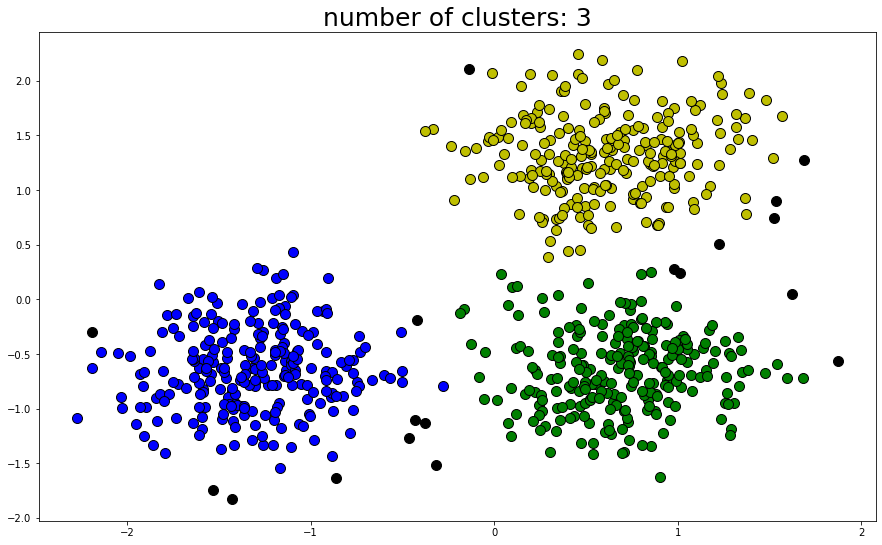

In [77]:
# Get the contents of each cluster

cluster1 = X[labels == 0]

cluster2 = X[labels == 1]

cluster3 = X[labels == 2]

# Plot the results with a specific color for each cluster, and a black color for the noise points

unique_labels = set(labels)

colors = ['y', 'b', 'g', 'r']

plt.figure(figsize=(15,9))

for k, col in zip(unique_labels, colors):
    
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)

plt.title('number of clusters: %d' %n_clusters_, size=25);

### By changing the “eps” and the “MinPts” values, we arrive at different cluster configurations, as shown in the following two figures for two different DBSCAN settings.